In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [5]:

data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

### Descriptive analysis

In [9]:
# data.Age

data["Age"]

0        71
1        34
2        80
3        40
4        43
         ..
49995    80
49996    40
49997    74
49998    21
49999    22
Name: Age, Length: 50000, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

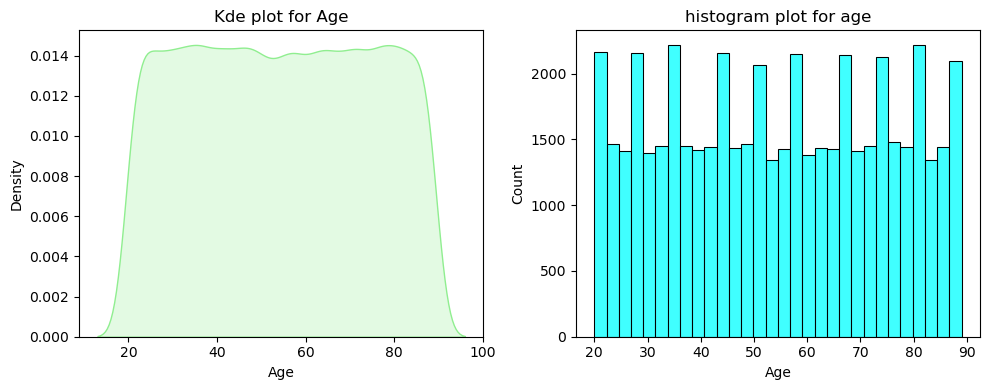

In [10]:
# plotting for age column

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("Kde plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30, kde=False, color="cyan")
plt.title("histogram plot for age")

plt.tight_layout()
plt.show


In [11]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

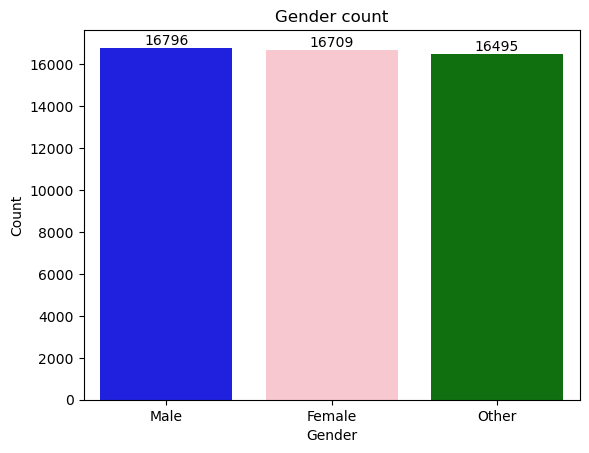

In [12]:
#gender columns

data['Gender'].value_counts()

sns.barplot(x= data['Gender'].value_counts().index,
            y=data['Gender'].value_counts().values,
            palette=["blue","pink", "green"]
            )

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v,str(v), ha='center', va='bottom')


plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

In [13]:
data['Gender'].value_counts()


Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

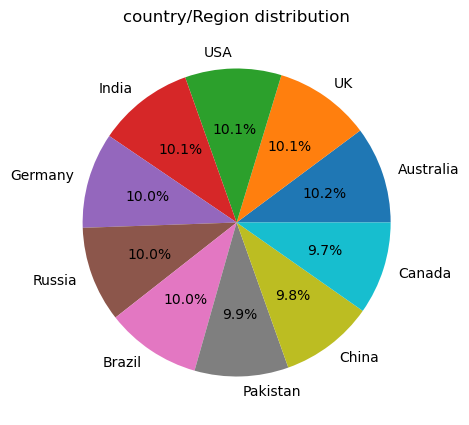

In [14]:
# countries columns

country_counts = data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct= '%1.1f%%'
        )

plt.title("country/Region distribution")
plt.show()

In [15]:
country_counts

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

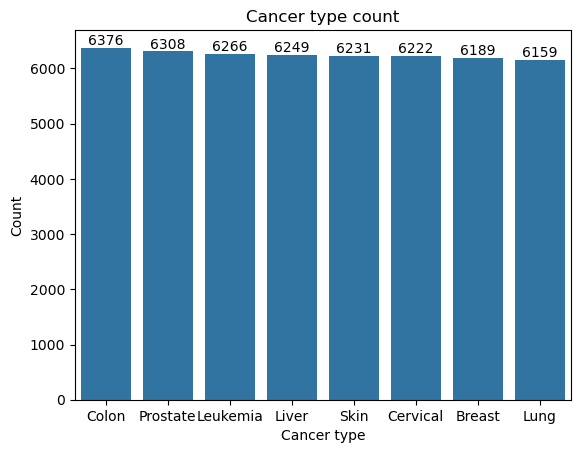

In [16]:
  # cancer type

data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values
)

for i , v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v,str(v), ha="center", va="bottom")


plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

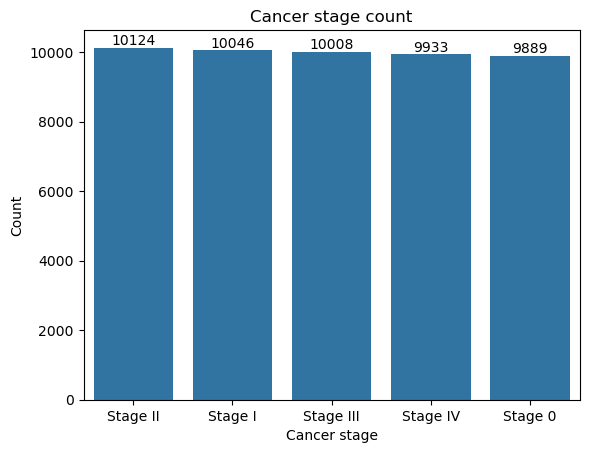

In [17]:
# cancer stage

data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values
)

for i , v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v,str(v), ha="center", va="bottom")


plt.title("Cancer stage count")
plt.xlabel("Cancer stage")
plt.ylabel("Count")
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

<function matplotlib.pyplot.show(close=None, block=None)>

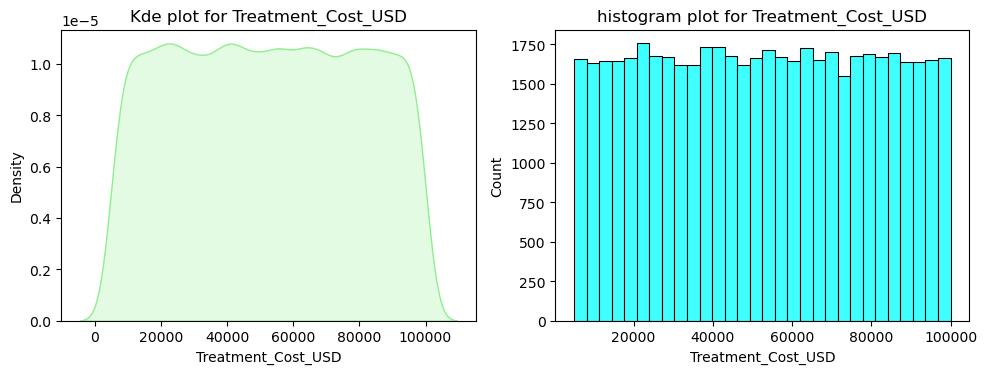

In [19]:
#plotting for treatment cost

data["Treatment_Cost_USD"]



plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("Kde plot for Treatment_Cost_USD")

plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30, kde=False, color="cyan")
plt.title("histogram plot for Treatment_Cost_USD")

plt.tight_layout()
plt.show



In [20]:
data["Treatment_Cost_USD"].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

In [46]:
# analyzing the risk factors

columns_of_interest = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

summary = data[columns_of_interest].agg(['mean', 'std', 'min', 'max'])

## Determine the relationship between risk factors and cancer severity


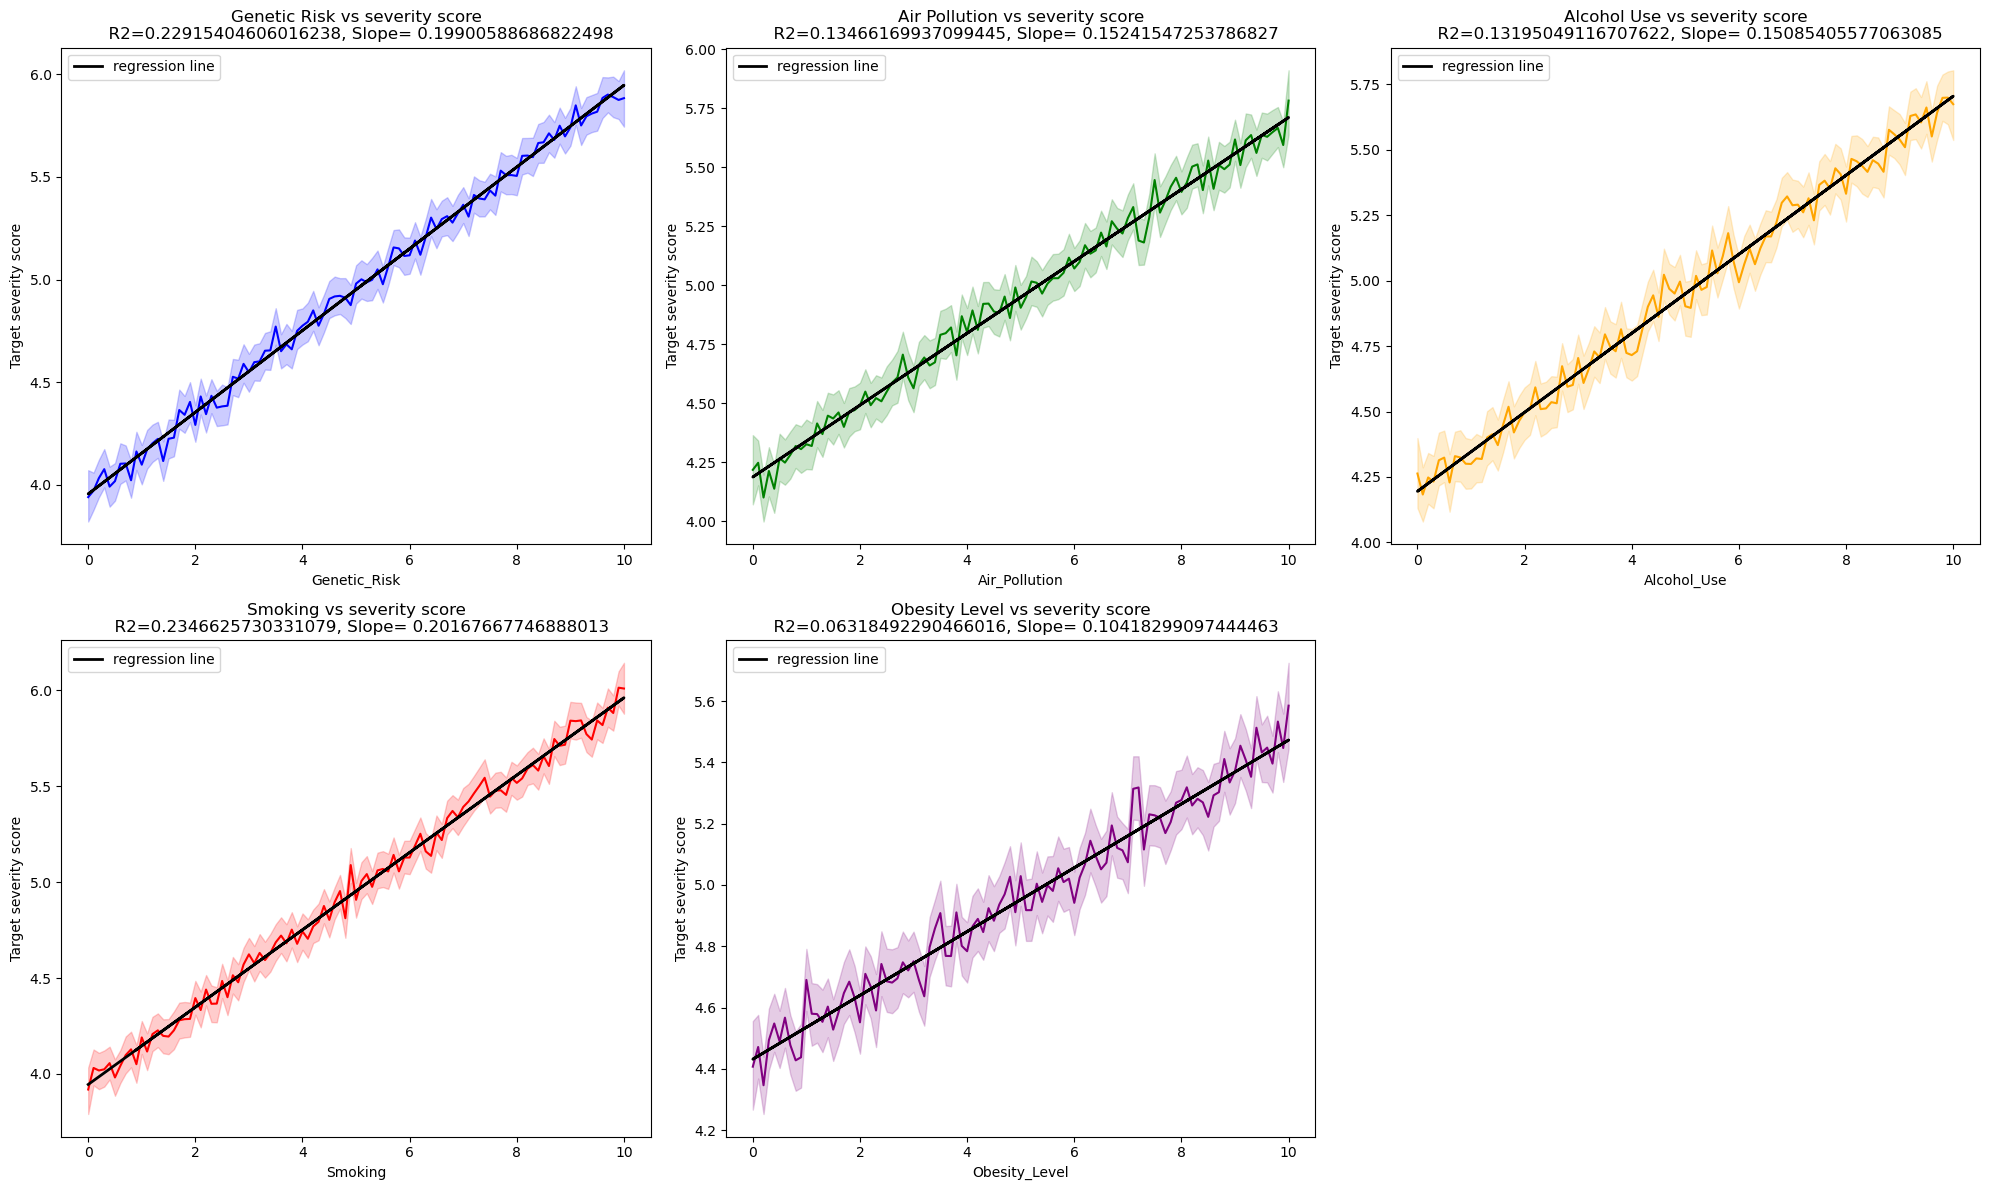

In [22]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

titles = ['Genetic Risk',
       'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']

colors = ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor, title, color) in enumerate(zip(risk_factors,titles, colors),1):
    plt.subplot(2,3,i)
    x= data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value , p_value, std_err= linregress(x,y)
    r_squared  = r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)

    plt.plot(x,x*slope+intercept,color="black", linewidth= 2, label="regression line")
    plt.title(f"{title} vs severity score\n  R2={r_squared}, Slope= {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target severity score")
    plt.legend()

plt.tight_layout()
plt.show()





## Analyze the proportion of early-stage diagnoses by cancer type

In [24]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [25]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [43]:
stage_count = data[data["Cancer_Type"]== "Lung"] ["Cancer_Stage"].value_counts()

early_stage_sum = stage_count.get("Stage 0", 0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of lungs cancer daignosed at stage 0 and stage I: {proportion}")




proportion of lungs cancer daignosed at stage 0 and stage I: 38.43156356551388


In [44]:
stage_count = data[data["Cancer_Type"]=="Leukemia"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Leukemia cancer daignosed at stage 0 and stage I: 39.53080114905841


In [45]:
stage_count = data[data["Cancer_Type"]=="Breast"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Breast cancer daignosed at stage 0 and stage I: 39.47325900791727


In [42]:
early_stage_sumstage_count = data[data["Cancer_Type"]=="Colon"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Colon cancer daignosed at stage 0 and stage I: 40.614498319731155


In [37]:
stage_count = data[data["Cancer_Type"]=="Skin"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Skin cancer daignosed at stage 0 and stage I: 40.41084898090194


In [38]:
stage_count = data[data["Cancer_Type"]=="Cervical"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Cervical cancer daignosed at stage 0 and stage I: 39.85856637737062


In [40]:
stage_count = data[data["Cancer_Type"]=="Prostate"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Prostate cancer daignosed at stage 0 and stage I: 40.187064045656314


In [41]:
stage_count = data[data["Cancer_Type"]=="Liver"] ["Cancer_Stage"].value_counts()

early_stage_sum= stage_count.get("Stage 0",0)+ stage_count.get("Stage I",0)

total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer daignosed at stage 0 and stage I: {proportion}")


proportion of Liver cancer daignosed at stage 0 and stage I: 40.614498319731155


In [ ]:
# claculate the Survival_Years rate of early stage VS late stage
# write a code to do the calculation of the proportion of all cancer daignosed at 
# stage 0 and stage I